### The success of the adaptations

In this notebook, we will analyze the success of the adaptations themselves: are they more successful than non-adaptations? Is there a correlation between the success of a book and of its adaptation? This success can both be represented in terms of box-office, rating and engagement (number of reviews).

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scripts.category_analysis import *
from scipy import stats

In [25]:
# Load the dataset adapted_movies
df = pd.read_csv('adapted_movies.csv')
df.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,1912.0,1912,NaN,NaN,NaN,NaN,6.5,502,"Dr. Friedrich von Kammacher , a surgeon, is de..."
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,1820.0,1820,NaN,NaN,NaN,NaN,5.6,98,"Set in late 12th century England, this silent ..."
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,1697.0,1697,The former Well Loved Tales series have been r...,3.97,1937.0,eng,6.0,1100,Cinderella is a winsome young girl who lives w...


In [26]:
# Load the inflation data
inflation_data = pd.read_csv('../data/dollar_inflation.csv')

# Merge the inflation data with the dataframe
df = pd.merge(df, inflation_data, left_on='MovieYear', right_on='year')

# Calculate the adjusted box office
df['MovieAdjustedBoxOffice'] = df['MovieBoxOffice'] / df['inflation']

# Drop the year and inflation columns
df = df.drop(columns=['year', 'inflation'])

# Display the updated dataframe
df.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot,MovieAdjustedBoxOffice
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,1912.0,1912,NaN,NaN,NaN,NaN,6.5,502,"Dr. Friedrich von Kammacher , a surgeon, is de...",NaN
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,1820.0,1820,NaN,NaN,NaN,NaN,5.6,98,"Set in late 12th century England, this silent ...",NaN
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,1697.0,1697,The former Well Loved Tales series have been r...,3.97,1937.0,eng,6.0,1100,Cinderella is a winsome young girl who lives w...,NaN


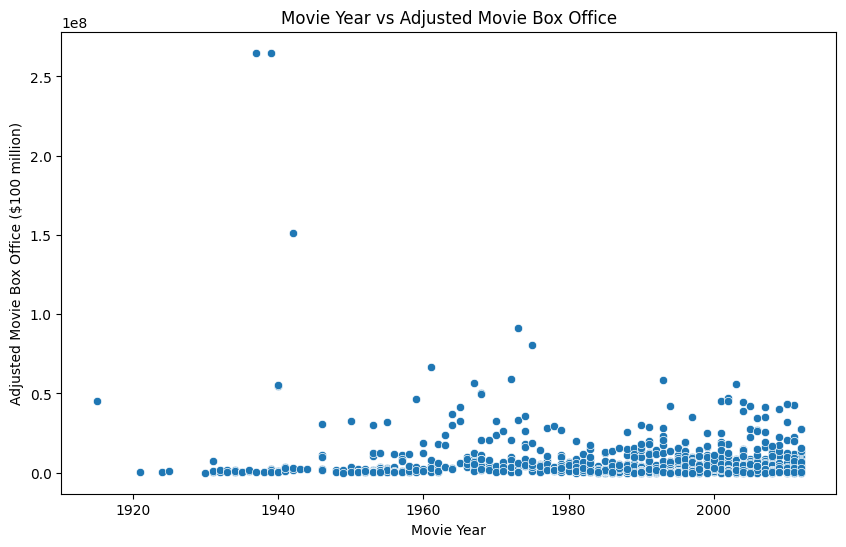

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieYear', y='MovieAdjustedBoxOffice')
plt.title('Movie Year vs Adjusted Movie Box Office')
plt.xlabel('Movie Year')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

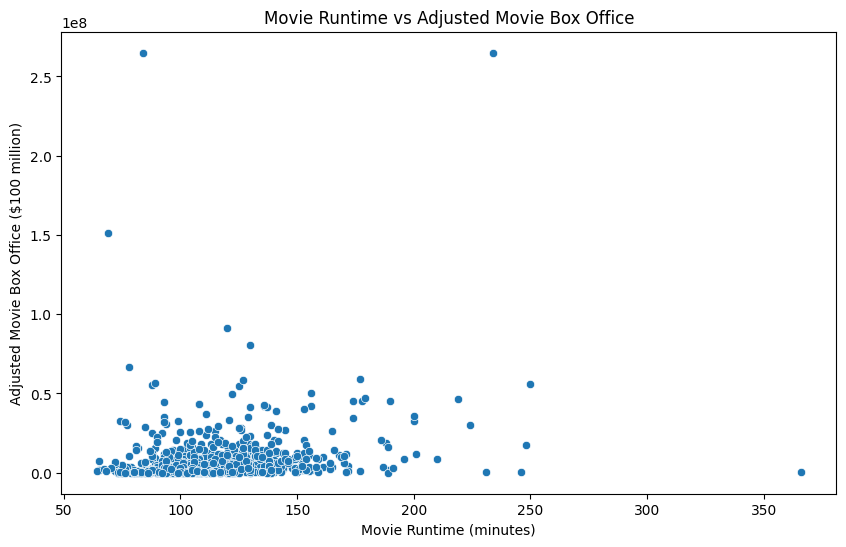

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieRuntime', y='MovieAdjustedBoxOffice')
plt.title('Movie Runtime vs Adjusted Movie Box Office')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

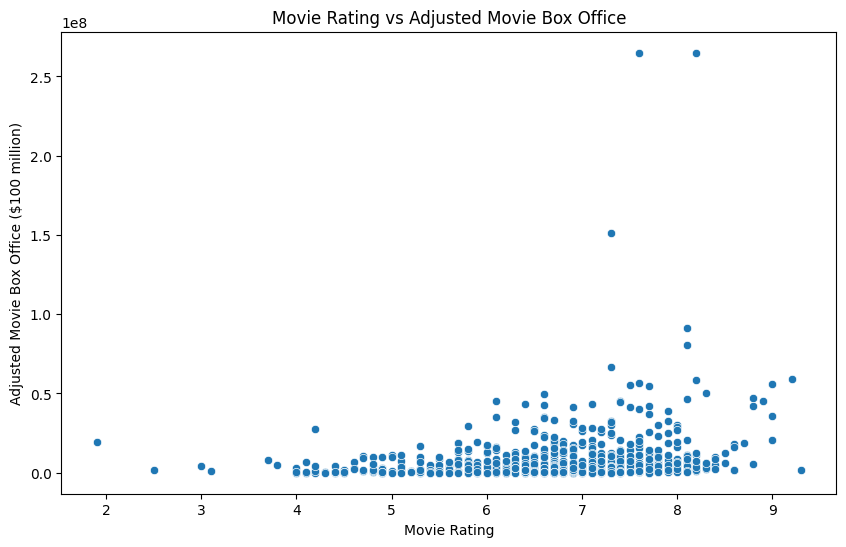

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieRating', y='MovieAdjustedBoxOffice')
plt.title('Movie Rating vs Adjusted Movie Box Office')
plt.xlabel('Movie Rating')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

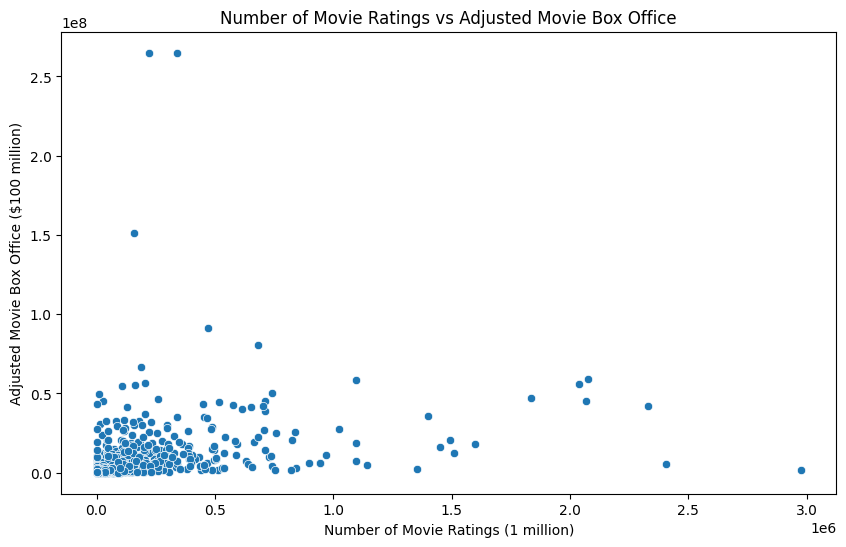

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieRatingNb', y='MovieAdjustedBoxOffice')
plt.title('Number of Movie Ratings vs Adjusted Movie Box Office')
plt.xlabel('Number of Movie Ratings (1 million)')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

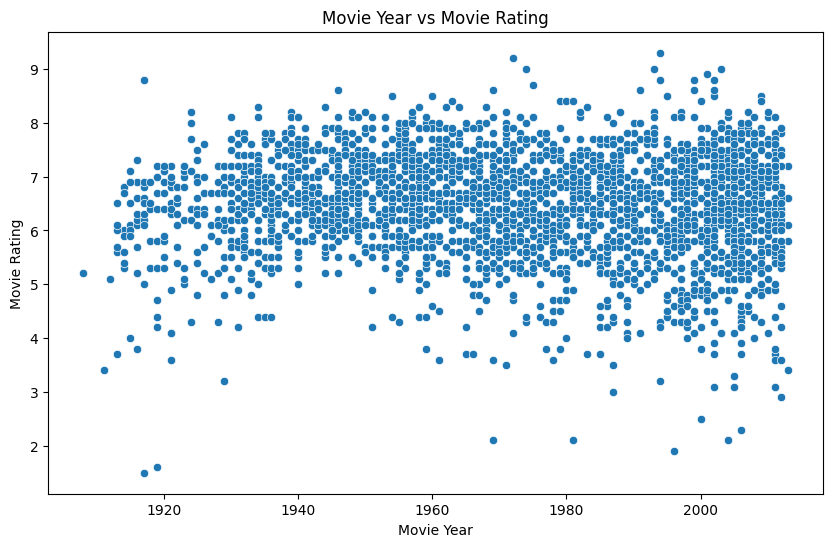

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieYear', y='MovieRating')
plt.title('Movie Year vs Movie Rating')
plt.xlabel('Movie Year')
plt.ylabel('Movie Rating')
plt.show()

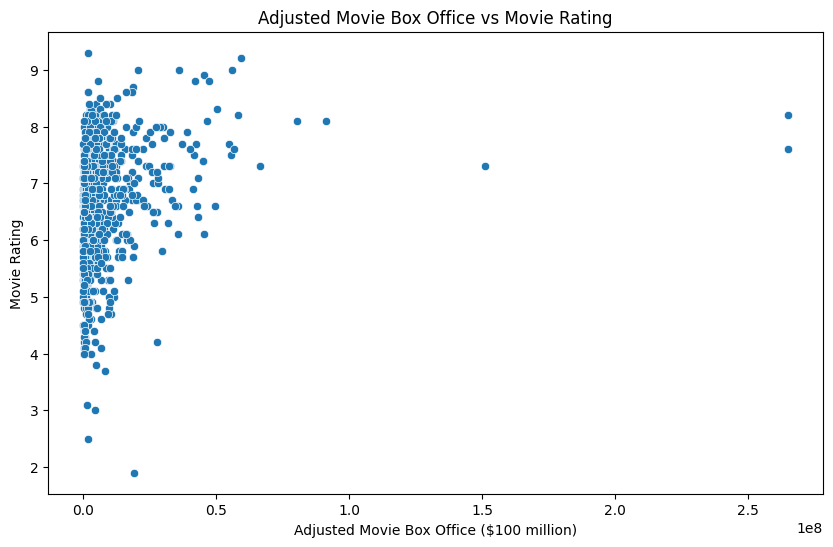

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieAdjustedBoxOffice', y='MovieRating')
plt.title('Adjusted Movie Box Office vs Movie Rating')
plt.xlabel('Adjusted Movie Box Office ($100 million)')
plt.ylabel('Movie Rating')
plt.show()

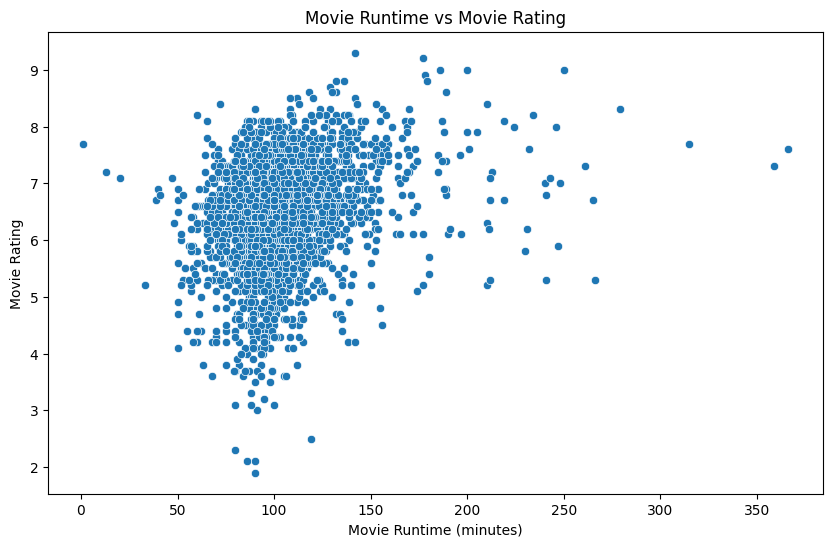

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieRuntime', y='MovieRating')
plt.title('Movie Runtime vs Movie Rating')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Movie Rating')
plt.show()

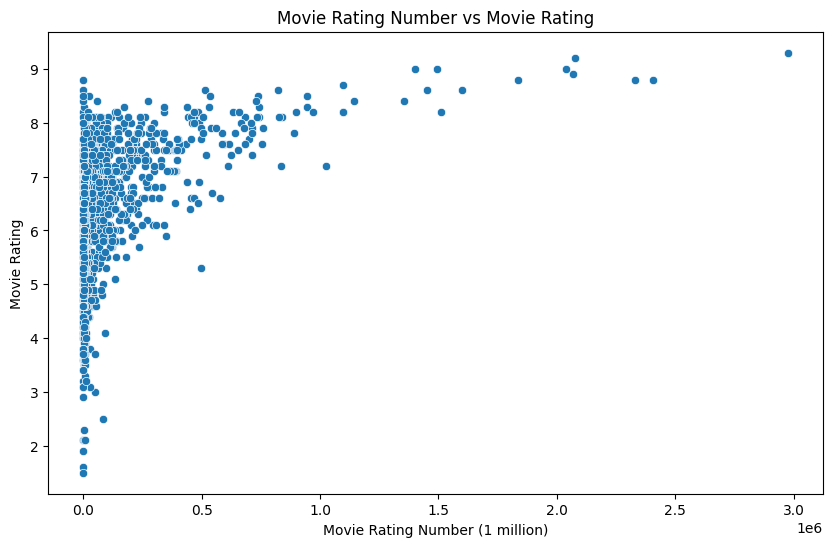

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MovieRatingNb', y='MovieRating')
plt.title('Movie Rating Number vs Movie Rating')
plt.xlabel('Movie Rating Number (1 million)')
plt.ylabel('Movie Rating')
plt.show()

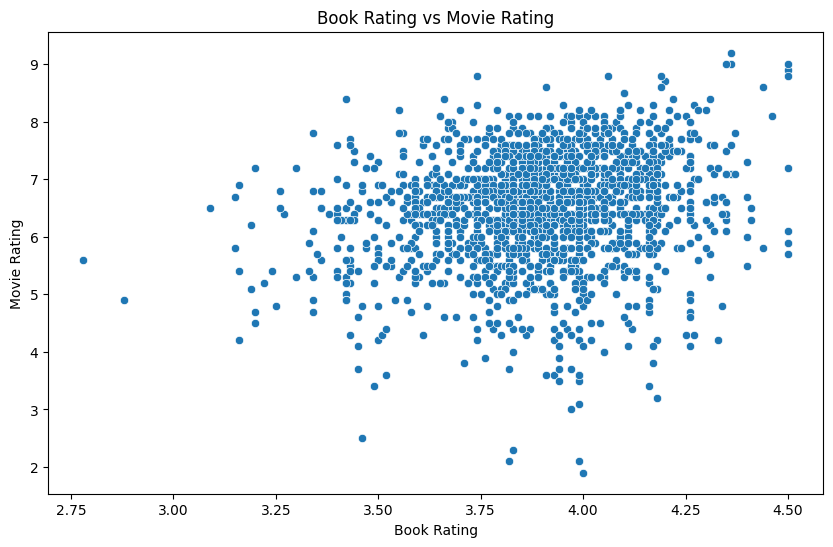

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BookRating', y='MovieRating')
plt.title('Book Rating vs Movie Rating')
plt.xlabel('Book Rating')
plt.ylabel('Movie Rating')
plt.show()

In [45]:
all_movies = pd.read_csv('all_movies.csv')
non_adapted_movies = all_movies[~all_movies['wikipedia_id'].isin(df['wikipedia_id'])]

Correlation Adjusted Box Office - Runtime

In [46]:
df_adjbo_rt = df.copy()
df_adjbo_rt = df_adjbo_rt.dropna(subset=['MovieAdjustedBoxOffice', 'MovieRuntime'])
pearson_adjbo_rt = stats.pearsonr(df_adjbo_rt['MovieAdjustedBoxOffice'], df_adjbo_rt['MovieRuntime'])
spearman_adjbo_rt = stats.spearmanr(df_adjbo_rt['MovieAdjustedBoxOffice'], df_adjbo_rt['MovieRuntime'])


print(pearson_adjbo_rt)
print(spearman_adjbo_rt)

PearsonRResult(statistic=0.2057120993409709, pvalue=1.8533070162138332e-11)
SignificanceResult(statistic=0.31761011621624885, pvalue=6.035949425827763e-26)


In [50]:
# Load the genre_categories JSON file
with open('../data/genre_categories.json', 'r') as file:
    genre_categories = json.load(file)

# Count the number of values in the genre_categories
num_values = sum(len(values) for values in genre_categories.values())
print(f'The number of values in genre_categories: {num_values}')

total = 0
for values in genre_categories.values():
    total += len(values)
print(f'The total number of values in genre_categories: {total}')

# Count the number of entries in the genre_categories
num_entries = len(genre_categories)
print(f'The number of entries in genre_categories: {num_entries}')


The number of values in genre_categories: 529
The total number of values in genre_categories: 529
The number of entries in genre_categories: 37
